## Match Analysis

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [15]:
matches.shape

(756, 14)

In [18]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [22]:
dicti = {"Delhi Daredevils":"Delhi Capitals"}
matches["team1"]=matches["team1"].replace(dicti)
matches["team2"]=matches["team2"].replace(dicti)
matches["toss_winner"]=matches["toss_winner"].replace(dicti)
matches["winner"]=matches["winner"].replace(dicti)

matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [24]:
CD =matches[np.logical_or(np.logical_and(matches['team1']=='Chennai Super Kings',matches['team2']=='Delhi Capitals'),
                            np.logical_and(matches['team2']=='Chennai Super Kings',matches['team1']=='Delhi Capitals'))]

CD.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
79,2008,Chennai,2008-05-02,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,normal,0,Delhi Capitals,0,8,V Sehwag,"MA Chidambaram Stadium, Chepauk"
87,2008,Delhi,2008-05-08,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,4,MS Dhoni,Feroz Shah Kotla
125,2009,Durban,2009-04-23,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Delhi Capitals,9,0,AB de Villiers,Kingsmead
141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium
185,2010,Delhi,2010-03-19,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,5,ML Hayden,Feroz Shah Kotla


In [27]:
CD.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019],
      dtype=int64)

In [32]:
CD.shape

(21, 14)

In [34]:
CD.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [35]:
CD.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,21.0,22.428571,33.482191,0.0,0.0,1.0,33.0,93.0
win_by_wickets,21.0,3.142857,3.539572,0.0,0.0,0.0,6.0,9.0


In [36]:
CD.groupby("winner")["winner"].count()

winner
Chennai Super Kings    15
Delhi Capitals          6
Name: winner, dtype: int64

Text(0.5, 1.0, 'CSK VS DC - head to head')

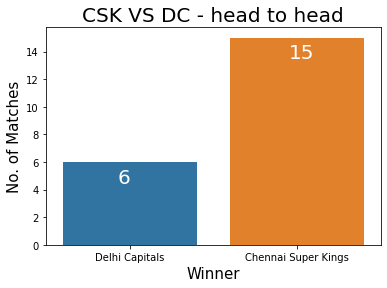

In [55]:
sns.countplot(CD["winner"])
plt.text(-0.07,4.5,str(CD['winner'].value_counts()['Delhi Capitals']),size=20,color='white')
plt.text(0.95,13.5,str(CD['winner'].value_counts()['Chennai Super Kings']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('CSK VS DC - head to head',fontsize = 20)

In [59]:
Season_wise_Match_Winner = pd.DataFrame(CD.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between CSK VS DC :")
Season_wise_Match_Winner

Season wise winner of matches between CSK VS DC :


winner count
season winner                           
2008   Chennai Super Kings             1
       Delhi Capitals                  1
2009   Chennai Super Kings             1
       Delhi Capitals                  1
2010   Chennai Super Kings             1
       Delhi Capitals                  1
2011   Chennai Super Kings             1
2012   Chennai Super Kings             2
       Delhi Capitals                  1
2013   Chennai Super Kings             2
2014   Chennai Super Kings             2
2015   Chennai Super Kings             1
       Delhi Capitals                  1
2018   Chennai Super Kings             1
       Delhi Capitals                  1
2019   Chennai Super Kings             3

In [62]:
Winning_Percentage = CD['winner'].value_counts()/len(CD['winner'])

In [63]:
print("CSK winning percentage against DC(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("DC winning percentage against CSK(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

CSK winning percentage against DC(overall) : 71%
DC winning percentage against CSK(overall) : 29%


In [64]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [65]:
performance("Chennai Super Kings",CD)

Number of times given team win while defending : 9
Number of times given team win while chasing   : 6

Average runs by which a given team wins while defending  :  48.0
Average wickets by which a given team wins while chasing :  6.0


In [66]:
performance("Delhi Capitals",CD)

Number of times given team win while defending : 2
Number of times given team win while chasing   : 4

Average runs by which a given team wins while defending  :  22.0
Average wickets by which a given team wins while chasing :  7.0


In [67]:
Toss_Decision_based_Winner = pd.DataFrame(CD.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner         toss_decision winner                     
Chennai Super Kings bat           Chennai Super Kings       4
                                  Delhi Capitals            3
                    field         Chennai Super Kings       4
                                  Delhi Capitals            1
Delhi Capitals      bat           Chennai Super Kings       2
                                  Delhi Capitals            1
                    field         Chennai Super Kings       5
                                  Delhi Capitals            1

In [69]:
Toss_Decision = pd.DataFrame(CD.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner         toss_decision               
Chennai Super Kings bat                        7
                    field                      5
Delhi Capitals      bat                        3
                    field                      6

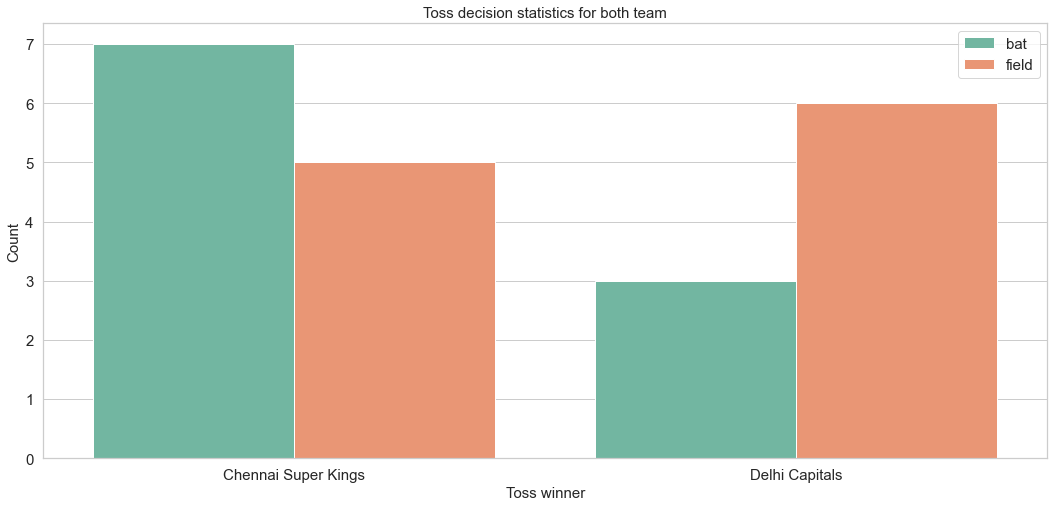

In [70]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(CD['toss_winner'],palette='Set2',hue=CD['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

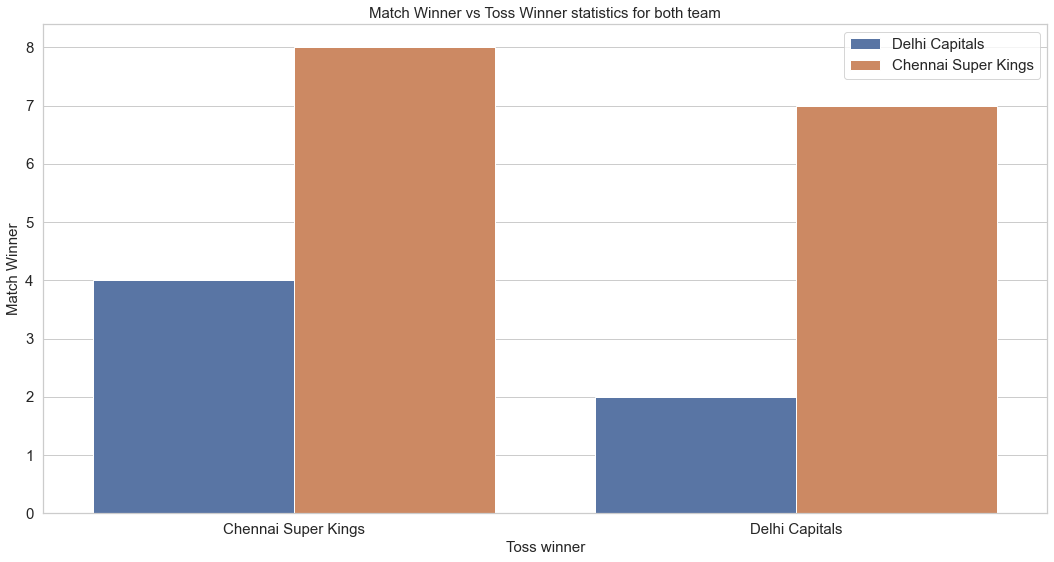

In [72]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CD['toss_winner'],hue=CD['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

In [73]:
CSK = CD[CD["toss_winner"]=="Chennai Super Kings"]
DC = CD[CD["toss_winner"]=="Delhi Capitals"]

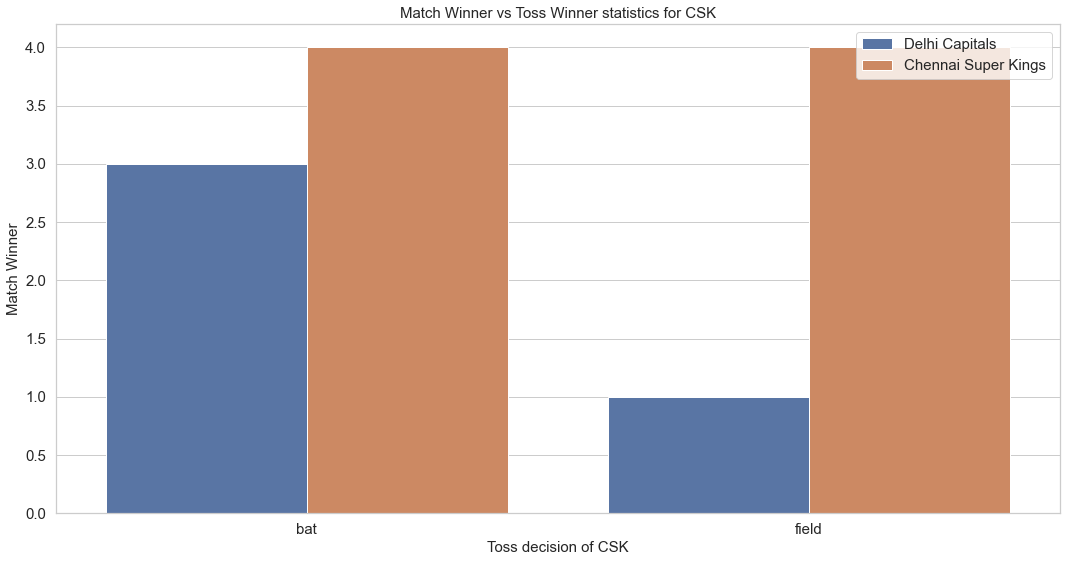

In [74]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(CSK['toss_decision'],hue=CSK['winner'])
plt.title('Match Winner vs Toss Winner statistics for CSK',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of CSK',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

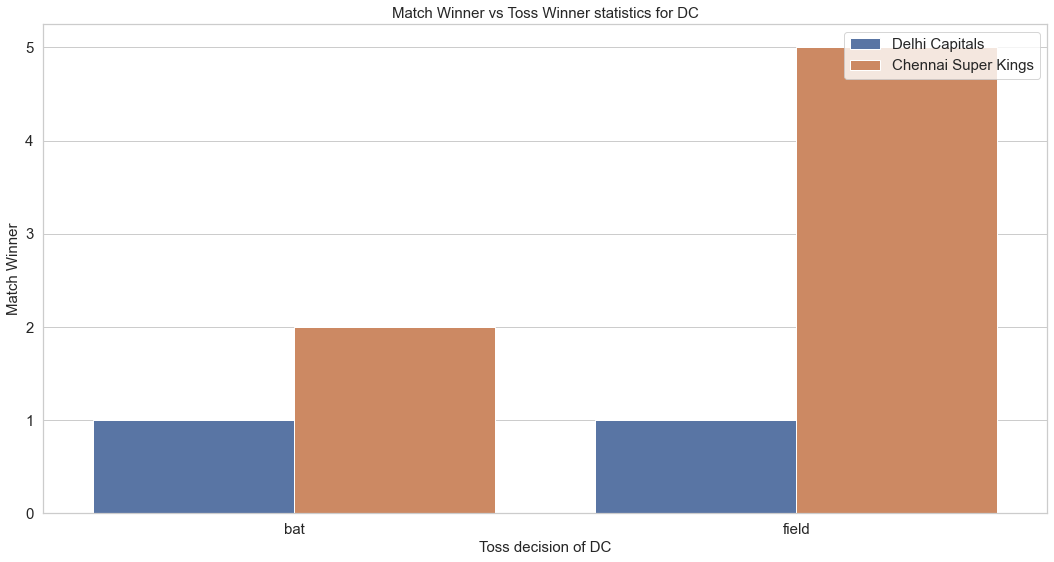

In [75]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(DC['toss_decision'],hue=DC['winner'])
plt.title('Match Winner vs Toss Winner statistics for DC',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of DC',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [77]:
player_of_the_match = pd.DataFrame(CD.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
MS Dhoni,4
SR Watson,2
Z Khan,1
M Morkel,1
SK Raina,1
ML Hayden,1
G Gambhir,1
SB Jakati,1
BW Hilfenhaus,1
AB de Villiers,1


### Recent Year Performance Analsyis

In [79]:
cond4 = CD["season"] == 2018
cond5 = CD["season"] == 2019
final = CD[cond4 | cond5]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7923,2018,Pune,30/04/18,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,13,0,SR Watson,Maharashtra Cricket Association Stadium
7945,2018,Delhi,18/05/18,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Delhi Capitals,34,0,HV Patel,Feroz Shah Kotla
11141,2019,Delhi,26/03/19,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,0,Chennai Super Kings,0,6,SR Watson,Feroz Shah Kotla Ground
11341,2019,Chennai,01/05/19,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,80,0,MS Dhoni,M. A. Chidambaram Stadium
11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [80]:
final.shape

(5, 14)

In [81]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
SR Watson,2
MS Dhoni,1
F du Plessis,1
HV Patel,1


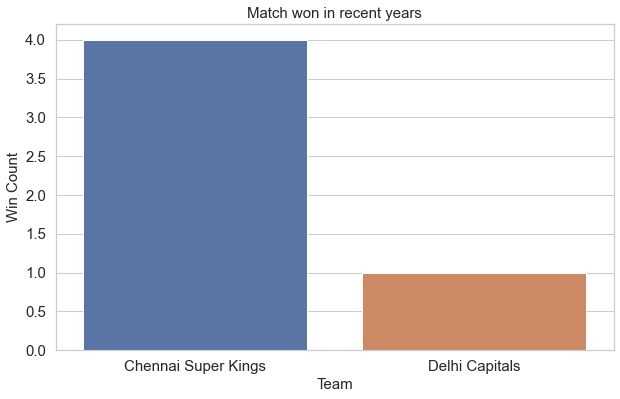

In [82]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)
#plt.legend(loc=1,fontsize=15)

plt.show()

From all the above analysis we can predict CSK to be favorite for this match